# Rapport - Labb 3

In [1]:
import pandas as pd
labelled_data = pd.read_csv('labelled_data.csv', header=None)

In [2]:
import numpy as np
# Common range for the x-axis
x_range = np.linspace(-5, 5, 100)

# Define the line functions
def line_y(x):
    return -x

def line_f(x):
    return -0.489 * x

def line_g(x):
    return -2 * x + 0.16

def line_h(x):
    return 800 * x - 120

In [3]:
# List of dictionaries, each defining a line and its plotting properties
lines = [
    {'func': line_y, 'label': 'y(x) = -x', 'color': 'black'},
    {'func': line_f, 'label': 'f(x) = -0.489x', 'color': 'orange'},
    {'func': line_g, 'label': 'g(x) = -2x + 0.16', 'color': 'blue'},
    {'func': line_h, 'label': 'h(x) = 800x - 120', 'color': 'purple'}
]

In [ ]:
import matplotlib.pyplot as plt
# Function to plot the classification for a given axis
def plot_classification(ax, data, x_range, line_info):
    """Plots the classified data points and the separation line on an axis."""
    # For plotting the line
    line_y_for_plot = line_info['func'](x_range)
    
    # Calculate the line's y-value at each data point's x-coordinate directly
    line_y_at_data_points = line_info['func'](data[0])
    
    # Split the data into points above and below the line
    above = data[data[1] > line_y_at_data_points]
    below = data[data[1] <= line_y_at_data_points]
    
    # Plot the points
    ax.scatter(above[0], above[1], color='green', s=10, label=f"{len(above)} points above")
    ax.scatter(below[0], below[1], color='red', s=10, label=f"{len(below)} points below")
    
    # Plot the line
    ax.plot(x_range, line_y_for_plot, color=line_info['color'], label=line_info['label'])
    
    # Configure the plot
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.legend()

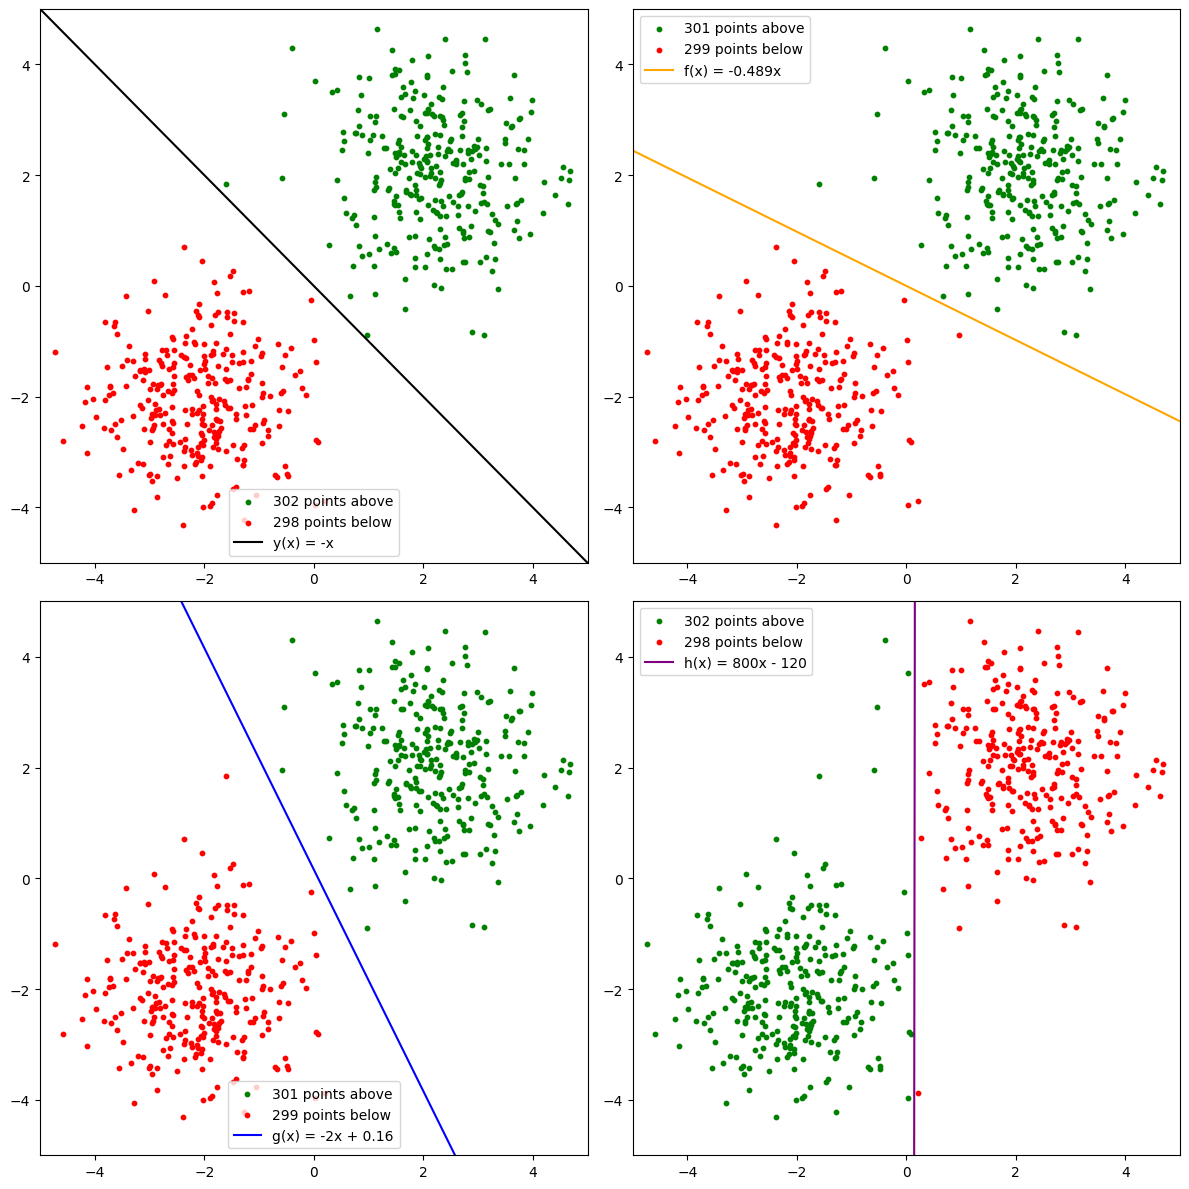

In [5]:
# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Iterate through the lines and axes to plot
for ax, line_info in zip(axs.flat, lines):
    plot_classification(ax, labelled_data, x_range, line_info)
# Show the plot
plt.tight_layout()
plt.show()